In [1]:
# This demo draws heavily from the handwritten digit example in
# Chapter 2 of Francois Chollet's "Deep Learning with Python" book.
# I've added a simpler single-layer example first before moving to
# the 2-layer example. -George Chen (CMU Fall 2017)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(train_images.shape)

(60000, 28, 28)


In [3]:
print(test_images.shape)

(10000, 28, 28)


In [4]:
flattened_train_images = train_images.reshape(len(train_images), -1)  # flattens out each training image
flattened_test_images = test_images.reshape(len(test_images), -1)  # flattens out each test image
flattened_train_images = flattened_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
flattened_test_images = flattened_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

from keras.utils import to_categorical
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [5]:
train_labels[0]

5

In [6]:
train_labels_categorical[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [7]:
print(flattened_train_images.shape)

(60000, 784)


(-0.5, 27.5, 27.5, -0.5)

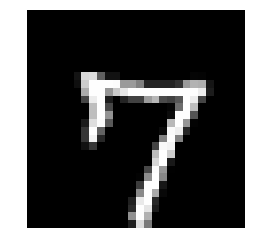

In [8]:
# this plots out one of the training images
idx = np.random.randint(len(train_images))  # random training image index
plt.imshow(train_images[idx], cmap='gray')
plt.axis('off')

(-0.5, 9.5, 783.5, -0.5)

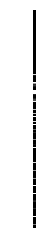

In [9]:
# this is just to visualize what the flattened version of the image above looks like;
# after flattening the image I replicate it horizontally (by 10 pixels) just for
# visualization purposes since otherwise the image is so thin (horizontally) that
# it's not easy to see anything
plt.imshow(np.hstack([train_images[idx].flatten().reshape((784,1))]*10), cmap='gray')
plt.axis('off')

In [10]:
# extremely shallow single-layer model
shallow_single_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
shallow_single_layer_model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))
shallow_single_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
shallow_single_layer_model.compile(optimizer='rmsprop',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

In [12]:
shallow_single_layer_model.fit(flattened_train_images,
                               train_labels_categorical,
                               validation_split=0.2,
                               epochs=5,
                               batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 52us/step - loss: 0.6773 - acc: 0.8320 - val_loss: 0.3634 - val_acc: 0.9040
Epoch 2/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.3518 - acc: 0.9034 - val_loss: 0.3090 - val_acc: 0.9129
Epoch 3/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.3159 - acc: 0.9123 - val_loss: 0.2897 - val_acc: 0.9178
Epoch 4/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.2994 - acc: 0.9157 - val_loss: 0.2819 - val_acc: 0.9220
Epoch 5/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.2895 - acc: 0.9189 - val_loss: 0.2749 - val_acc: 0.9231


In [13]:
test_loss, test_acc = shallow_single_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.9223


In [14]:
# two-layer model
two_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
two_layer_model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
two_layer_model.add(layers.Dense(10, activation='softmax'))
two_layer_model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
two_layer_model.fit(flattened_train_images,
                    train_labels_categorical,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 225us/step - loss: 0.2850 - acc: 0.9170 - val_loss: 0.1450 - val_acc: 0.9593
Epoch 2/5
48000/48000 [==============================] - 10s 215us/step - loss: 0.1200 - acc: 0.9641 - val_loss: 0.1080 - val_acc: 0.9677
Epoch 3/5
48000/48000 [==============================] - 10s 209us/step - loss: 0.0774 - acc: 0.9770 - val_loss: 0.0925 - val_acc: 0.9717
Epoch 4/5
48000/48000 [==============================] - 10s 218us/step - loss: 0.0567 - acc: 0.9830 - val_loss: 0.0836 - val_acc: 0.9749
Epoch 5/5
48000/48000 [==============================] - 11s 220us/step - loss: 0.0418 - acc: 0.9879 - val_loss: 0.0829 - val_acc: 0.9747


In [16]:
test_loss, test_acc = two_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 83us/step
Test accuracy: 0.9777


In [19]:
print(train_images.shape)
scaled_train_images = train_images.reshape(len(train_images), train_images.shape[1], train_images.shape[2], -1)  # flattens out each training image
print(scaled_train_images.shape)
scaled_test_images = test_images.reshape(len(test_images), test_images.shape[1], test_images.shape[2], -1)  # flattens out each test image
scaled_train_images = scaled_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
scaled_test_images = scaled_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

(60000, 28, 28)
(60000, 28, 28, 1)


In [18]:
print(scaled_train_images.shape)

(60000, 28, 28, 1)


In [20]:
simple_convnet_model = models.Sequential()
#filters=32 kernel sixe 3*3
simple_convnet_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
simple_convnet_model.add(layers.MaxPooling2D((2, 2)))
simple_convnet_model.add(layers.Flatten())
simple_convnet_model.add(layers.Dense(512, activation='relu'))
simple_convnet_model.add(layers.Dense(10, activation='softmax'))
simple_convnet_model.summary()

simple_convnet_model.compile(optimizer='rmsprop',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
_________________________________________________________________


In [21]:
simple_convnet_model.fit(scaled_train_images,
                         train_labels_categorical,
                         validation_split=0.2,
                         epochs=5,
                         batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 74s 2ms/step - loss: 0.2083 - acc: 0.9357 - val_loss: 0.0770 - val_acc: 0.9773
Epoch 2/5
48000/48000 [==============================] - 72s 2ms/step - loss: 0.0574 - acc: 0.9822 - val_loss: 0.0575 - val_acc: 0.9826
Epoch 3/5
48000/48000 [==============================] - 72s 1ms/step - loss: 0.0341 - acc: 0.9897 - val_loss: 0.0477 - val_acc: 0.9862
Epoch 4/5
48000/48000 [==============================] - 72s 1ms/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0486 - val_acc: 0.9873
Epoch 5/5
48000/48000 [==============================] - 70s 1ms/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.0576 - val_acc: 0.9857


In [21]:
test_loss, test_acc = simple_convnet_model.evaluate(scaled_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 366us/step
Test accuracy: 0.9848


In [26]:
simple_convnet_model_avoid_overfitting = models.Sequential()
###output,kernel size, input size
simple_convnet_model_avoid_overfitting.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
simple_convnet_model_avoid_overfitting.add(layers.MaxPooling2D((2, 2)))
simple_convnet_model_avoid_overfitting.add(layers.Flatten())
simple_convnet_model_avoid_overfitting.add(layers.Dense(64, activation='relu'))
simple_convnet_model_avoid_overfitting.add(layers.Dense(10, activation='softmax'))
simple_convnet_model_avoid_overfitting.summary()

simple_convnet_model_avoid_overfitting.compile(optimizer='rmsprop',
                                               loss='categorical_crossentropy',
                                               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [27]:
simple_convnet_model_avoid_overfitting.fit(scaled_train_images,
                                           train_labels_categorical,
                                           validation_split=0.2,
                                           epochs=5,
                                           batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 31s 639us/step - loss: 0.7022 - acc: 0.7945 - val_loss: 0.3449 - val_acc: 0.8918
Epoch 2/5
48000/48000 [==============================] - 30s 617us/step - loss: 0.3055 - acc: 0.9079 - val_loss: 0.2329 - val_acc: 0.9311
Epoch 3/5
48000/48000 [==============================] - 30s 616us/step - loss: 0.2233 - acc: 0.9326 - val_loss: 0.2096 - val_acc: 0.9368
Epoch 4/5
48000/48000 [==============================] - 30s 625us/step - loss: 0.1722 - acc: 0.9493 - val_loss: 0.1554 - val_acc: 0.9556
Epoch 5/5
48000/48000 [==============================] - 30s 619us/step - loss: 0.1340 - acc: 0.9600 - val_loss: 0.1247 - val_acc: 0.9634


In [28]:
test_loss, test_acc = simple_convnet_model_avoid_overfitting.evaluate(scaled_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 266us/step
Test accuracy: 0.9642


In [29]:
deeper_convnet_model_avoid_overfitting = models.Sequential()
deeper_convnet_model_avoid_overfitting.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
deeper_convnet_model_avoid_overfitting.add(layers.MaxPooling2D((2, 2)))
deeper_convnet_model_avoid_overfitting.add(layers.Conv2D(32, (3, 3), activation='relu'))
deeper_convnet_model_avoid_overfitting.add(layers.MaxPooling2D((2, 2)))
deeper_convnet_model_avoid_overfitting.add(layers.Flatten())
deeper_convnet_model_avoid_overfitting.add(layers.Dense(64, activation='relu'))
deeper_convnet_model_avoid_overfitting.add(layers.Dense(10, activation='softmax'))
deeper_convnet_model_avoid_overfitting.summary()

deeper_convnet_model_avoid_overfitting.compile(optimizer='rmsprop',
                                               loss='categorical_crossentropy',
                                               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total para

In [30]:
deeper_convnet_model_avoid_overfitting.fit(scaled_train_images,
                                           train_labels_categorical,
                                           validation_split=0.2,
                                           epochs=5,
                                           batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 47s 974us/step - loss: 0.9271 - acc: 0.7205 - val_loss: 0.3923 - val_acc: 0.8859
Epoch 2/5
48000/48000 [==============================] - 46s 949us/step - loss: 0.3396 - acc: 0.8974 - val_loss: 0.2267 - val_acc: 0.9316
Epoch 3/5
48000/48000 [==============================] - 46s 953us/step - loss: 0.2110 - acc: 0.9360 - val_loss: 0.1540 - val_acc: 0.9560
Epoch 4/5
48000/48000 [==============================] - 46s 956us/step - loss: 0.1456 - acc: 0.9560 - val_loss: 0.1748 - val_acc: 0.9474
Epoch 5/5
48000/48000 [==============================] - 47s 969us/step - loss: 0.1112 - acc: 0.9663 - val_loss: 0.0944 - val_acc: 0.9733


In [31]:
test_loss, test_acc = deeper_convnet_model_avoid_overfitting.evaluate(scaled_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 5s 464us/step
Test accuracy: 0.9744
